In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
# import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
# sns.set(palette='deep', style='darkgrid', rc={"figure.figsize": (15, 4)})

# Семинар - Задача распознавания рукописных цифр

In [4]:
from sklearn.datasets import load_digits

### Загрузим данные

In [5]:
data = load_digits()
print(data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
X, y = data.data, data.target

In [7]:
print('В датасете {} объектов и {} признака'.format(X.shape[0], X.shape[1]))

В датасете 1797 объектов и 64 признака


### Посмотрим на объекты:

Class name: 2
[[ 0.  0.  0.  5. 14. 12.  2.  0.]
 [ 0.  0.  7. 15.  8. 14.  4.  0.]
 [ 0.  0.  6.  2.  3. 13.  1.  0.]
 [ 0.  0.  0.  1. 13.  4.  0.  0.]
 [ 0.  0.  1. 11.  9.  0.  0.  0.]
 [ 0.  8. 16. 13.  0.  0.  0.  0.]
 [ 0.  5. 14. 16. 11.  2.  0.  0.]
 [ 0.  0.  0.  6. 12. 13.  3.  0.]]


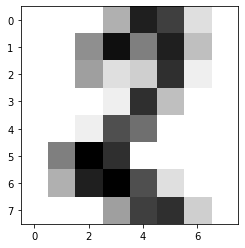

In [8]:
i = np.random.randint(0, X.shape[0])
print('Class name: {}'.format(y[i]))
print(X[i].reshape(8,8))

X[i]
plt.imshow(X[i].reshape(8,8), cmap='gray_r')
plt.show()

Посмотрим на баланс классов:

In [9]:
counts = np.unique(y, return_counts=True)
pd.DataFrame(counts[1], counts[0], columns=['counts']);
# sns.barplot(counts[0], counts[1])
# plt.show()

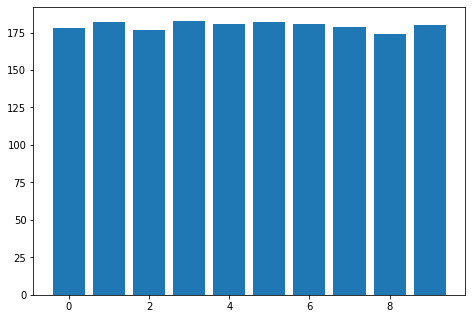

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(counts[0], counts[1])
plt.show()

Разделим выборку на две части: обучающую и тестовую

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5, 
                                                    shuffle=True,
                                                   random_state=18)
X_train.shape, X_test.shape, y_train.shape, y_test.shape  

((898, 64), (899, 64), (898,), (899,))

## Метод ближайших соседей

In [13]:
from sklearn.neighbors import KNeighborsClassifier

Зададим классификатор:

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
knn.fit(X_train, y_train)
knn_predictons = knn.predict(X_test)

In [16]:
preds = pd.DataFrame(y_test, columns=['True'])
preds['knn_pred'] = knn_predictons

In [17]:
preds.head()

,True,knn_pred
0,0,0
1,3,3
2,4,4
3,4,4
4,8,8


In [18]:
# Посмотрим долю правильных ответов:
def accuracy(true, predictions):
    acc = # Ваш код здесь:
    return acc
accuracy(y_test, knn_predictons)

0.9866518353726362

In [19]:
#Тоже самое средставми sklearn:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, knn_predictons)

0.9866518353726362

Постройте график зависимости доли верных ответов на тесте от количества соседей (от 1 до 100):

In [20]:
# Д/З Ваш код здесь: 

Построим матрицу корреляции (ошибок):

[[84  0  0  0  1  0  0  0  0  0]
 [ 0 90  0  0  0  1  0  0  1  0]
 [ 0  0 86  0  0  0  0  0  0  0]
 [ 0  0  0 91  0  1  0  0  1  0]
 [ 0  0  0  0 85  0  0  0  0  0]
 [ 0  0  0  0  0 94  0  0  0  1]
 [ 0  0  0  0  0  0 94  0  1  0]
 [ 0  0  0  0  0  0  0 91  0  0]
 [ 0  3  0  0  0  0  0  0 80  1]
 [ 0  0  0  0  1  0  0  0  0 92]]


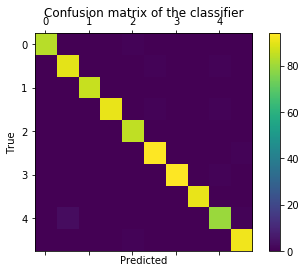

In [21]:
labels = list(counts[0])
cm = confusion_matrix(y_test, knn_predictons, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Постройте такую же матрицу корреляции (только красивее) с помощью библиотеки seaborn [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [22]:
# Д/З Ваш код здесь: 

Посмотрим точность ответов (precision) без учета различных классов (всего TP/(всего TP + всего FP)):

In [23]:
def precision(true, predictions):
    
    # Д/З Ваш код здесь:     
    
    prec = 0 
    return prec
precision(y_test, knn_predictons)

0

Тоже самое средставми sklearn:

In [24]:
from sklearn.metrics import precision_score
precision_score(y_test, knn_predictons, average='micro')

0.9866518353726362

Посмотрим точность ответов (precision) без учета различных классов (всего TP/(всего TP + всего FP)):

In [25]:
def recall(true, predictions):
    
    # Д/З Ваш код здесь:  
    
    rec = 0 
    return rec
recall(y_test, knn_predictons)

0

Тоже самое средставми sklearn:

In [26]:
from sklearn.metrics import recall_score
recall_score(y_test, knn_predictons, average='micro')

0.9866518353726362

Посмотрим точность ответов (precision) без учета различных классов (всего TP/(всего TP + всего FP)):

In [27]:
def F1_score(true, predictions):
    
    # Д/З Ваш код здесь:     
    
    f1 = 0 
    return f1
F1_score(y_test, knn_predictons)

0

Тоже самое средставми sklearn:

In [28]:
from sklearn.metrics import f1_score
f1_score(y_test, knn_predictons, average='micro')

0.9866518353726362

# Теперь давайте построим ROC curve:

Для этого, в отличае от других метрий, нам понадобятся не предсказания модели, а вероятности принадлежности классам, которые модель выдает.

In [29]:
probs = knn.predict_proba(X_test)

Также необходибо бинаризовать метки классов для подсчета TPR и FPR

In [30]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=counts[0])

In [31]:
y_test_bin[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Считаем TPR и FPR для каждого класса

In [32]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in counts[0]:
    fpr[i], tpr[i], threshold = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [33]:
roc_auc

{0: 1.0,
 1: 0.9988618608911157,
 2: 1.0,
 3: 0.9999733183916326,
 4: 0.999949414655297,
 5: 0.9999476302697041,
 6: 0.999986907567426,
 7: 1.0,
 8: 0.993200408997955,
 9: 0.9998065583393367}

In [34]:
fpr["micro"], tpr["micro"], threshold = roc_curve(y_test_bin.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
roc_auc["micro"]

0.9992849688519453

In [35]:
def plot_roc_curve(index=8):
    plt.figure()
    lw = 2
    plt.plot(fpr[index], tpr[index], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[index])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for class {}'.format(index))
    plt.legend(loc="lower right")
    plt.show()

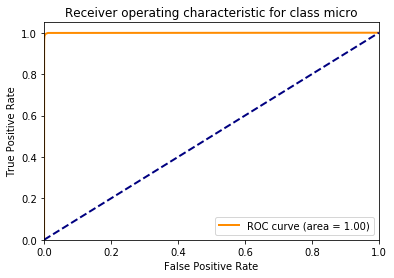

In [36]:
plot_roc_curve("micro")

## Кросвалидация

Представим, что у нас нет дополнительных данных для проверки своей модели. Мы можем посмотреть точность на тренировочной выборке!

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)

In [39]:
cvs = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5)
print('Средняя доля правильных ответов на кросс валидации: %.3f' % np.mean(cvs))

Средняя доля правильных ответов на кросс валидации: 0.972


## Поиск оптимальных параметров по сетке

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
n = np.linspace(1, 21, 21, dtype=int)

In [42]:
kNN_cv = KNeighborsClassifier(n_neighbors=5)
params = { 
    # Ваш код здесь:
         }

gcv = GridSearchCV(kNN_cv, param_grid=params, cv=5, scoring='accuracy')
gcv.fit(X_train, y_train);

In [43]:
def print_cv_results(a, len_gs, params, param_r, param_sep): 
    d = len(params['param_grid'][param_sep])
    ar=np.array(a).reshape(d,len_gs).T
    df=pd.DataFrame(ar)

    pen_par=params['param_grid'][param_sep]
    c_par=params['param_grid'][param_r]
    if type(c_par) != list: 
        c_par = c_par.tolist()
    columns_mapper=dict(zip(range(0, len(pen_par)),pen_par))
    row_mapper=dict(zip(range(0, len(c_par)), c_par))

    df.rename(columns=columns_mapper, index=row_mapper, inplace=True)

    plot = df.plot(title='Mean accuracy rating',grid=True)
    plot.set_xlabel(param_r, fontsize=13)
    plot.set_ylabel('acc', rotation=0, fontsize=13, labelpad=15)

In [45]:
gcv.get_params();

{'metric': 'minkowski', 'n_neighbors': 1}

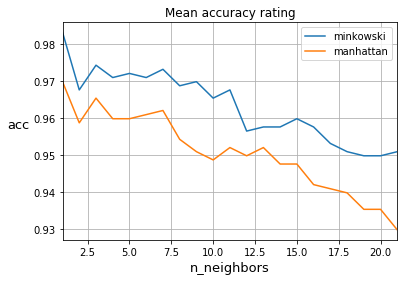

In [46]:
print_cv_results(gcv.cv_results_['mean_test_score'],
                 21, gcv.get_params(), 'n_neighbors','metric')
gcv.best_params_

In [47]:
print('Лучший скор %.4f' % gcv.best_score_)
print('при метрике %(metric)s и %(n_neighbors)s соседей' % gcv.best_params_)

Лучший скор 0.9833
при метрике minkowski и 1 соседей


#### Что получится на тесте?

In [48]:
accuracy_score(y_test, gcv.predict(X_test))

0.9844271412680756

In [49]:
gcv_preds = pd.DataFrame(gcv.predict(X_test), columns=['kNN'])

In [50]:
gcv_preds['True'] = y_test

In [51]:
gcv_preds

,kNN,True
0,0,0
1,3,3
2,4,4
3,4,4
4,8,8
...,...,...
894,0,0
895,1,1
896,8,8
897,0,0


Посмотрим на те цифры, которые "путает" наш классификатор

In [52]:
gcv_preds[gcv_preds['True'] != gcv_preds['kNN']]

,kNN,True
8,5,3
78,1,8
107,5,1
252,4,9
308,9,3
324,1,8
477,8,6
572,8,9
579,4,0
611,1,6


# : 252 True:  9 Predictions:  4


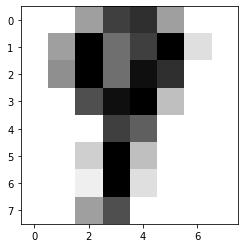

In [53]:
n = gcv_preds[gcv_preds['True'] != gcv_preds['kNN']].shape[0]
confused = gcv_preds[gcv_preds['True'] != gcv_preds['kNN']].index[np.random.randint(0,n)]
example = X_test[confused].reshape(8,8)
print("# :", confused, 
      "True: ", gcv_preds.iloc[confused]['True'],
      "Predictions: ",gcv_preds.iloc[confused]['kNN'])
plt.imshow(example, cmap='gray_r')
plt.show()

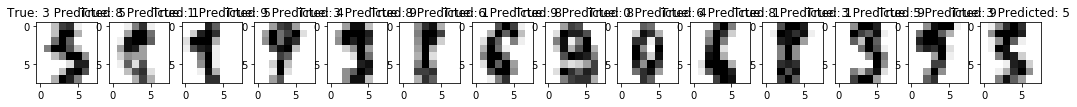

In [54]:
n = gcv_preds[gcv_preds['True'] != gcv_preds['kNN']].shape[0]
fig, ax = plt.subplots(1, n, figsize=(18, 18))
for axi, i in zip(ax, np.arange(n)):
    confused = gcv_preds[gcv_preds['True'] != gcv_preds['kNN']].index[i]
    example = X_test[confused].reshape(8,8)
    axi.set_title('True: {} Predicted: {}'.format(gcv_preds.iloc[confused]['True'],gcv_preds.iloc[confused]['kNN']))
    axi.imshow(example, cmap='gray_r')

# Нормализация

Так как мы работаем с пикселями изображения - все признаки имеют "одинаковую" значимость.

P.S. Проводить нормализацию можно как для всего изображения (матрицы), так и для каждого пикселя отдельно.

Проведите нормировку признаков, вычислите точность, сделайте выводы

In [55]:
# Д/З Ваш код здесь: 

Проведите стандартизацию признаков, вычислите точность, сделайте выводы

In [56]:
# Д/З Ваш код здесь:  